In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

iris = load_iris()

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[3, 8, 0, 6], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Sepal length", fontsize=14)
        plt.ylabel("Sepal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


In [4]:
X = iris.data[:, 0:2] # sepal length and width
y = iris.target

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y);

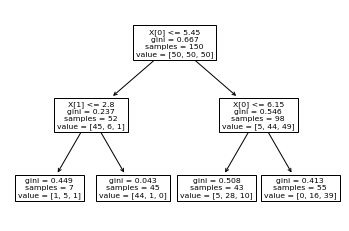

In [6]:
plot_tree(tree_clf);

Text(6.2, 0.15, 'Depth=1 (right)')

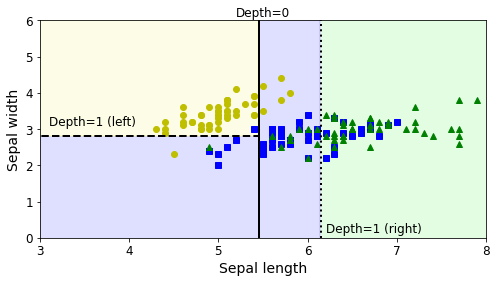

In [7]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([5.45, 5.45], [0, 6], "k-", linewidth=2)
plt.plot([0, 5.45], [2.8, 2.8], "k--", linewidth=2)
plt.plot([6.15, 6.15], [0, 6], "k:", linewidth=2)

plt.text(5.2, 6.1, "Depth=0", fontsize=12)
plt.text(3.1, 3.1, "Depth=1 (left)", fontsize=12)
plt.text(6.2, 0.15, "Depth=1 (right)", fontsize=12)


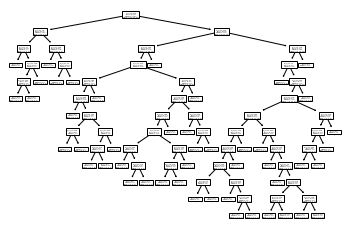

In [8]:
tree_clf1 = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf1.fit(X, y)

plot_tree(tree_clf1);

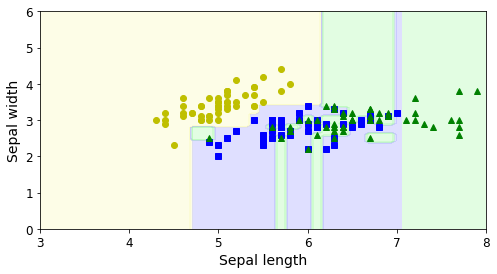

In [9]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf1, X, y)

# Predicting classes and class probabilities

In [10]:
tree_clf.predict_proba([[7, 3]])

array([[0.        , 0.29090909, 0.70909091]])

In [11]:
tree_clf.predict([[7, 3]])
i=0

# Sensitivity to training set details

In [12]:
def succcess_rate(arr):
    pred_values = arr[0]
    y_test = arr[1]
    succcess_rate = []
    
    for pred_values_ in pred_values:
        score = 0
        for i in range(len(pred_values_)-1):
            if(pred_values_[i] == y_test[i]):
                score = score + 1  
        succcess_rate.append(score/len(pred_values_))
    return succcess_rate
        
def error_rate(arr):
    pred_values = arr[0]
    y_test = arr[1]
    error_rate = []

    for pred_values_ in pred_values:
        score = 0
        for i in range(len(pred_values_)-1):
            if(pred_values_[i] != y_test[i]):
                score = score + 1  
        error_rate.append(score/len(pred_values_))
    return error_rate

In [13]:
def specificity(arr): #TN / (TN + FP)
    pred_values = arr[0]
    y_test = arr[1]

    Iris_Setosa      = []
    Iris_Versicolour = []
    Iris_Virginica   = []

    for pred_values_ in pred_values:

        Iris_Setosa_FP      = 0
        Iris_Versicolour_FP = 0
        Iris_Virginica_FP   = 0

        Iris_Setosa_TN      = 0
        Iris_Versicolour_TN = 0
        Iris_Virginica_TN   = 0

        for i in range(len(pred_values_)-1):
            if(y_test[i] != pred_values_[i]):
                if(pred_values_[i] == 0):    
                    Iris_Setosa_FP = Iris_Setosa_FP + 1
                    continue
                else:
                    Iris_Setosa_TN = Iris_Setosa_TN + 1
                if(pred_values_[i] == 1):
                    Iris_Versicolour_FP = Iris_Versicolour_FP + 1
                    continue
                else:
                    Iris_Versicolour_TN = Iris_Versicolour_TN + 1
                if(pred_values_[i] == 2):
                    Iris_Virginica_FP = Iris_Virginica_FP + 1
                    continue
                else:
                    Iris_Virginica_TN = Iris_Virginica_TN + 1
                    
        if(Iris_Setosa_FP + Iris_Setosa_TN == 0):
            Iris_Setosa.append(0)
        if(Iris_Setosa_FP + Iris_Setosa_TN != 0):
            Iris_Setosa.append( Iris_Setosa_TN / ( Iris_Setosa_FP + Iris_Setosa_TN ))

        if(Iris_Versicolour_FP + Iris_Versicolour_TN == 0):
            Iris_Versicolour.append(0)
        if(Iris_Versicolour_FP + Iris_Versicolour_TN != 0):
            Iris_Versicolour.append( Iris_Versicolour_TN / ( Iris_Versicolour_FP + Iris_Versicolour_TN ))
        
        if(Iris_Virginica_FP + Iris_Virginica_TN == 0):
            Iris_Virginica.append(0)
        if(Iris_Virginica_FP + Iris_Virginica_TN != 0):
            Iris_Virginica.append( Iris_Virginica_TN / ( Iris_Virginica_FP + Iris_Virginica_TN ))
    
    return [Iris_Setosa,Iris_Versicolour,Iris_Virginica]

In [14]:
def percision(arr): #TP / (TP + FP)
    pred_values = arr[0]
    y_test = arr[1]
   
    Iris_Setosa      = []
    Iris_Versicolour = []
    Iris_Virginica   = []

    for pred_values_ in pred_values:

        Iris_Setosa_TP      = 0
        Iris_Versicolour_TP = 0
        Iris_Virginica_TP   = 0

        Iris_Setosa_FP      = 0
        Iris_Versicolour_FP = 0
        Iris_Virginica_FP   = 0

        for i in range(len(pred_values_)-1):

            if(pred_values_[i] == 0):
                if(y_test[i] == pred_values_[i]):
                    Iris_Setosa_TP = Iris_Setosa_TP + 1
                    continue
                else:
                    Iris_Setosa_FP = Iris_Setosa_FP + 1
            if(pred_values_[i] == 1):
                if(y_test[i] == pred_values_[i]):
                    Iris_Versicolour_TP = Iris_Versicolour_TP + 1
                    continue
                else:
                    Iris_Versicolour_FP = Iris_Versicolour_FP + 1
            if(pred_values_[i] == 2):
                if(y_test[i] == pred_values_[i]):
                    Iris_Virginica_TP = Iris_Virginica_TP + 1
                    continue
                else:
                    Iris_Virginica_FP = Iris_Virginica_FP + 1

        if(Iris_Setosa_TP + Iris_Setosa_FP == 0):
            Iris_Setosa.append(0)
        if(Iris_Setosa_TP + Iris_Setosa_FP != 0):
            Iris_Setosa.append( Iris_Setosa_TP / ( Iris_Setosa_TP + Iris_Setosa_FP ))
        
        if(Iris_Versicolour_TP + Iris_Versicolour_FP == 0):
            Iris_Versicolour.append(0)
        if(Iris_Versicolour_TP + Iris_Versicolour_FP != 0):
            Iris_Versicolour.append( Iris_Versicolour_TP / ( Iris_Versicolour_TP + Iris_Versicolour_FP ))
        
        if(Iris_Virginica_TP + Iris_Virginica_FP == 0):
            Iris_Virginica.append(0)
        if(Iris_Virginica_TP + Iris_Virginica_FP != 0):
            Iris_Virginica.append( Iris_Virginica_TP / ( Iris_Virginica_TP + Iris_Virginica_FP ))
    
    return [Iris_Setosa,Iris_Versicolour,Iris_Virginica]

In [15]:
def sensitivity(arr): #TP / (TP + FN)
    pred_values = arr[0]
    y_test = arr[1]
   
    Iris_Setosa      = []
    Iris_Versicolour = []
    Iris_Virginica   = []

    for pred_values_ in pred_values:

        Iris_Setosa_TP      = 0
        Iris_Versicolour_TP = 0
        Iris_Virginica_TP   = 0

        Iris_Setosa_FN      = 0
        Iris_Versicolour_FN = 0
        Iris_Virginica_FN   = 0

        for i in range(len(pred_values_)-1):
            if(pred_values_[i] == 0):
                if(y_test[i] == pred_values_[i]):
                    Iris_Setosa_TP = Iris_Setosa_TP + 1
                    continue
                else:
                    Iris_Versicolour_FN = Iris_Versicolour_FN + 1
                    Iris_Virginica_FN = Iris_Virginica_FN + 1
                    continue

            if(pred_values_[i] == 1):
                if(y_test[i] == pred_values_[i]):
                    Iris_Versicolour_TP = Iris_Versicolour_TP + 1
                    continue
                else:
                    Iris_Setosa_FN = Iris_Setosa_FN + 1
                    Iris_Virginica_FN = Iris_Virginica_FN + 1
                    continue

            if(pred_values_[i] == 2):
                if(y_test[i] == pred_values_[i]):
                    Iris_Virginica_TP = Iris_Virginica_TP + 1
                    continue
                else:
                    Iris_Setosa_FN = Iris_Setosa_FN + 1
                    Iris_Versicolour_FN = Iris_Versicolour_FN + 1
                    continue

        if(Iris_Setosa_TP + Iris_Setosa_FN == 0):
            Iris_Setosa.append(0)
        if(Iris_Setosa_TP + Iris_Setosa_FN != 0):
            Iris_Setosa.append( Iris_Setosa_TP / ( Iris_Setosa_TP + Iris_Setosa_FN ))
        
        if(Iris_Versicolour_TP + Iris_Versicolour_FN == 0):
            Iris_Versicolour.append(0)
        if(Iris_Versicolour_TP + Iris_Versicolour_FN != 0):
            Iris_Versicolour.append( Iris_Versicolour_TP / ( Iris_Versicolour_TP + Iris_Versicolour_FN ))
        
        if(Iris_Virginica_TP + Iris_Virginica_FN == 0):
            Iris_Virginica.append(0)
        if(Iris_Virginica_TP + Iris_Virginica_FN != 0):
            Iris_Virginica.append( Iris_Virginica_TP / ( Iris_Virginica_TP + Iris_Virginica_FN ))
    
    return [Iris_Setosa,Iris_Versicolour,Iris_Virginica]

In [16]:
from sklearn.model_selection import KFold

def k_fold(X, y, k):
    kf = KFold(n_splits=k, shuffle=False)

    pred_values = []
    arr = []
    i = 0

    for train_index , test_index in kf.split(X):
        tree_clf_k = DecisionTreeClassifier(max_depth=5, random_state=42)

        X_train , X_test = X[train_index,:],X[test_index,:]
        y_train , y_test = y[train_index], y[test_index]
        
        tree_clf_k.fit(X_train,y_train)
        pred_values.append(tree_clf_k.predict(X_test))

        i = i + 1

    return pred_values , y_test

kf = k_fold(X,y, 5)


In [17]:
def f_measure(recall_,percision):
    f_measure = []
    for i in range(len(recall_)):
        f =( 2 * recall_[i] * percision_[i] ) / ( recall_[i] + percision_[i] )
        f_measure.append(f)
    return f_measure

In [32]:
accuracy_ = []
sensitivity_ = []
specificity_ = []
recall_ = []
percision_ = []

upper = 147
for i in range (9,10):
    kf = k_fold(X, y, i)
    mean_accuracy = np.mean(succcess_rate(kf))

    accuracy_.append(mean_accuracy)

    mean_sensitivity = np.mean(sensitivity(kf))
    sensitivity_.append(mean_sensitivity)

    mean_specificity = np.mean(specificity(kf))
    specificity_.append(mean_specificity)

    mean_percision = np.mean(percision(kf))
    percision_.append(mean_percision)

recall_ = sensitivity_



([array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2]), array([2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2]), array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0]), array([1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1]), array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2]), array([2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1]), array([1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1])], array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


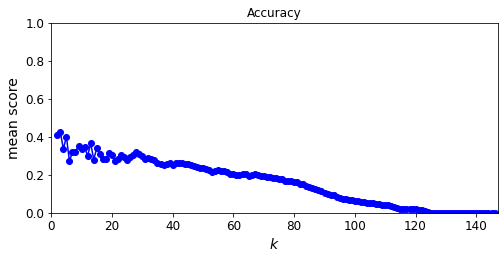

In [19]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2,upper), accuracy_, "bo-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("mean score", fontsize=14)
plt.axis([0, upper, 0, 1])
plt.title("Accuracy")
plt.show()

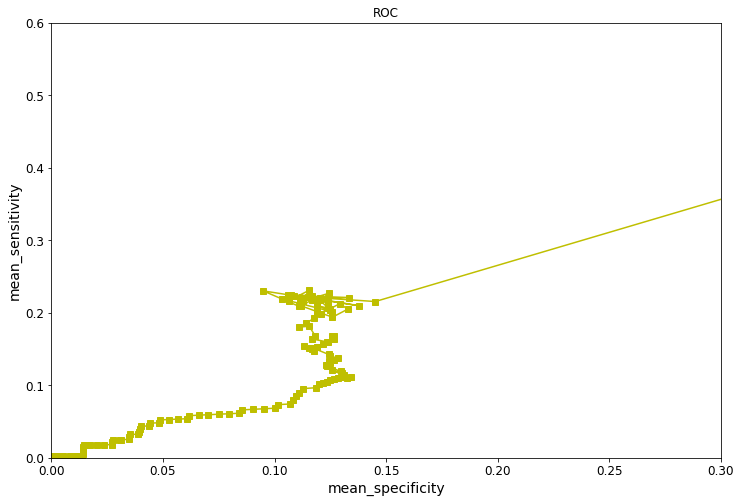

In [20]:
plt.figure(figsize=(12,8))
plt.plot(sensitivity_, specificity_,  "ys-")

plt.xlabel("mean_specificity", fontsize=14)
plt.ylabel("mean_sensitivity", fontsize=14)
plt.axis([0.0, 0.3, 0, 0.6])
plt.title("ROC")
plt.show()

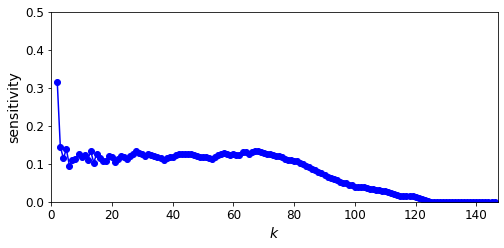

In [21]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2,upper), sensitivity_, "bo-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("sensitivity", fontsize=14)
plt.axis([0, upper, 0, 0.5])
plt.show()

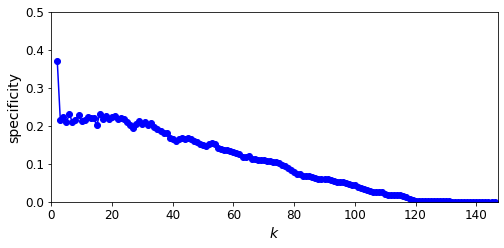

In [22]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2,upper), specificity_, "bo-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("specificity", fontsize=14)
plt.axis([0, upper, 0, 0.5])
plt.show()

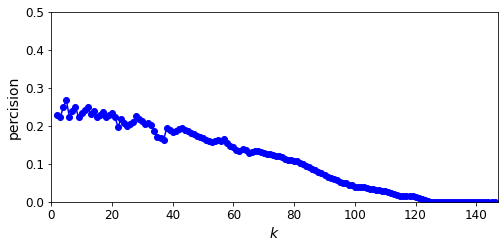

In [23]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2,upper), percision_, "bo-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("percision", fontsize=14)
plt.axis([0, upper, 0, 0.5])
plt.show()

<ipython-input-17-b8ddb839c9ae>:4: RuntimeWarning: invalid value encountered in double_scalars
  f =( 2 * recall_[i] * percision_[i] ) / ( recall_[i] + percision_[i] )


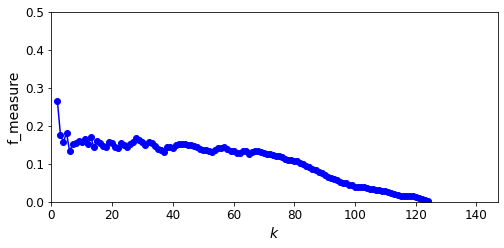

In [24]:

plt.figure(figsize=(8, 3.5))
plt.plot(range(2,upper), f_measure(recall_,percision_), "bo-")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("f_measure", fontsize=14)
plt.axis([0, upper, 0, 0.5])
plt.show()


In [25]:
import random
def percentage_set(percentage):
    X1 = X
    y1 = y
    training_set = random.sample(range((len(X))), (int(np.floor(len(X)*percentage))))
    target_set = []
    i = 0
    for index in training_set:
        training_set[i] = X1[index]

        np.delete(X1,index)
        np.delete(y1,index)

        target_set.append(y[index])
        i = i+1

    tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
    tree_clf2.fit(training_set, target_set)

    test_output = tree_clf2.predict(X1)
    plot_tree(tree_clf2);

    return succcess_rate([[test_output], y1])

30% training set

[0.74]

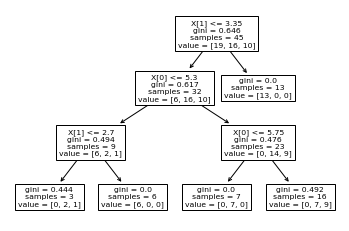

In [26]:
percentage_set(0.3)

60% training set

[0.8066666666666666]

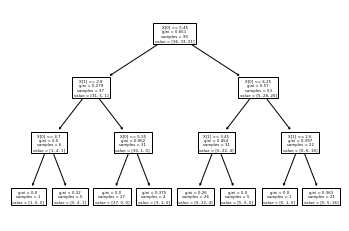

In [27]:
percentage_set(0.6)

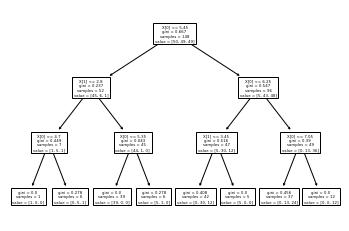

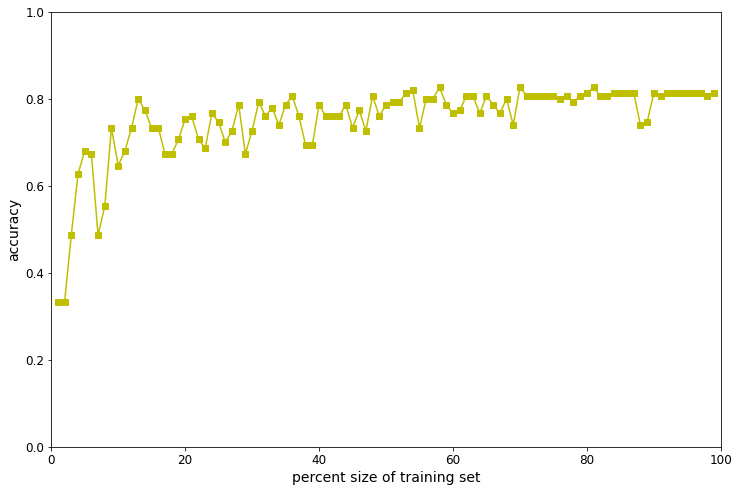

In [28]:
training_percentages = []
for i in range(1,100):
    percent = i/100
    training_percentages.append(percentage_set(percent)[0])

plt.figure(figsize=(12,8))
plt.plot(range(1,100), training_percentages,  "ys-")
plt.xlabel("percent size of training set", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
plt.axis([0.0, 100, 0, 1])
plt.show()
